<a href="https://colab.research.google.com/github/mycodelocker/ArtificialIntelligence/blob/main/14042021_first_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)

In [ ]:
print(iris.head())

     0    1    2    3            4
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [ ]:
iris.columns = ['sl','sw','pl','pw','class']

In [ ]:
print(iris[['sl','sw','pl','pw']].groupby(iris['class']).mean())

                    sl     sw     pl     pw
class                                      
Iris-setosa      5.006  3.418  1.464  0.244
Iris-versicolor  5.936  2.770  4.260  1.326
Iris-virginica   6.588  2.974  5.552  2.026


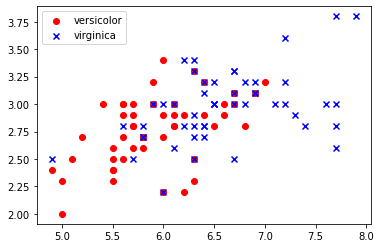

In [ ]:
y = iris.iloc[50:, 4].values 
y = np.where(y == 'Iris-versicolor', -1, 1) 
X = iris.iloc[50:, [0, 1]].values 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='versicolor') 
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='virginica') 
plt.legend(loc='best')

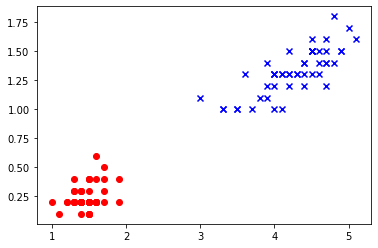

In [ ]:
y = iris.iloc[0:100, 4].values 
y = np.where(y == 'Iris-setosa', -1, 1) 
X = iris.iloc[0:100, [2, 3]].values 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa') 
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='versicolor') 

In [ ]:
import sklearn

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [ ]:
y = iris.iloc[50:, 4].values 
y = np.where(y == 'Iris-versicolor', -1, 1) 
X = iris.iloc[50:, :4].values 

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(70, 4)
(70,)


In [ ]:
ppn = Perceptron(eta0=0.05,max_iter=7)
ppn.fit(X_train,y_train)        #Training the model
y_pred = ppn.predict(X_test)    #getting the y-hat for test data
print("Misclassified",(y_pred!=y_test).sum())   #Check misclassification

Misclassified 2


C:\Users\Microsoft\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:577: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


In [ ]:
print(ppn.coef_)

[[-0.11  2.15]]


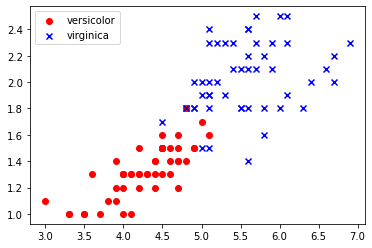

In [ ]:
y = iris.iloc[50:, 4].values 
y = np.where(y == 'Iris-versicolor', -1, 1) 
X = iris.iloc[50:, [2, 3]].values 
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='versicolor') 
plt.scatter(X[50:, 0], X[50:, 1], color='blue', marker='x', label='virginica') 
plt.legend(loc='best')

In [ ]:
print(iris.head())

    sl   sw   pl   pw        class
0  5.1  3.5  1.4  0.2  Iris-setosa
1  4.9  3.0  1.4  0.2  Iris-setosa
2  4.7  3.2  1.3  0.2  Iris-setosa
3  4.6  3.1  1.5  0.2  Iris-setosa
4  5.0  3.6  1.4  0.2  Iris-setosa


In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
iris['n_class'] = le.fit_transform(iris['class'])

In [ ]:
print(iris.head())

    sl   sw   pl   pw        class  n_class
0  5.1  3.5  1.4  0.2  Iris-setosa        0
1  4.9  3.0  1.4  0.2  Iris-setosa        0
2  4.7  3.2  1.3  0.2  Iris-setosa        0
3  4.6  3.1  1.5  0.2  Iris-setosa        0
4  5.0  3.6  1.4  0.2  Iris-setosa        0


In [ ]:
X = iris[['sl','sw','pl','pw']]

In [ ]:
X.shape

(150, 4)

In [ ]:
y = iris['n_class']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [ ]:
Y = pd.get_dummies(y).values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.3)

In [ ]:
print(X_train.shape)
print(y_train.shape)

(105, 4)
(105, 3)


In [ ]:
dt = DecisionTreeClassifier(max_depth=10,criterion='entropy')
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Misclassified",(y_test != y_pred).sum())

Misclassified 4


In [ ]:
from sklearn.tree import plot_tree
cn = ['setosa', 'versicolor', 'virginica']

[Text(148.8, 195.696, 'pl <= 2.6\ngini = 0.664\nsamples = 105\nvalue = [36, 31, 38]\nclass = virginica'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 36\nvalue = [36, 0, 0]\nclass = setosa'),
 Text(186.0, 152.208, 'pw <= 1.75\ngini = 0.495\nsamples = 69\nvalue = [0, 31, 38]\nclass = virginica'),
 Text(111.60000000000001, 108.72, 'pl <= 5.05\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]\nclass = versicolor'),
 Text(74.4, 65.232, 'sl <= 4.95\ngini = 0.062\nsamples = 31\nvalue = [0, 30, 1]\nclass = versicolor'),
 Text(37.2, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = virginica'),
 Text(111.60000000000001, 21.744, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]\nclass = versicolor'),
 Text(148.8, 65.232, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(260.40000000000003, 108.72, 'pl <= 4.85\ngini = 0.054\nsamples = 36\nvalue = [0, 1, 35]\nclass = virginica'),
 Text(223.20000000000002, 65.232, 'sl <= 6.05\ngini = 0.5\nsamples = 2\nvalue

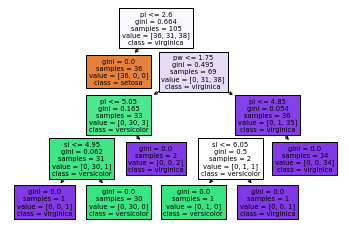

In [ ]:
plot_tree(dt, feature_names=iris.columns, class_names=cn,filled=True)

In [ ]:
print(DecisionTreeClassifier.__doc__)

A decision tree classifier.

    Read more in the :ref:`User Guide <tree>`.

    Parameters
    ----------
    criterion : {"gini", "entropy"}, default="gini"
        The function to measure the quality of a split. Supported criteria are
        "gini" for the Gini impurity and "entropy" for the information gain.

    splitter : {"best", "random"}, default="best"
        The strategy used to choose the split at each node. Supported
        strategies are "best" to choose the best split and "random" to choose
        the best random split.

    max_depth : int, default=None
        The maximum depth of the tree. If None, then nodes are expanded until
        all leaves are pure or until all leaves contain less than
        min_samples_split samples.

    min_samples_split : int or float, default=2
        The minimum number of samples required to split an internal node:

        - If int, then consider `min_samples_split` as the minimum number.
        - If float, then `min_samples_spli

In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense

In [ ]:
from keras.optimizers import SGD, Adam

In [ ]:
model = Sequential()

In [ ]:
model.add(Dense(10,input_shape=(4,),activation='tanh'))
model.add(Dense(8,activation='sigmoid'))
model.add(Dense(12,activation='tanh'))
model.add(Dense(3,activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
model.compile(Adam(lr=0.04),
              'categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 10)                50        
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 88        
_________________________________________________________________
dense_3 (Dense)              (None, 12)                108       
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 39        
Total params: 285
Trainable params: 285
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,epochs=50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
105/105 [==============================] - 8s 76ms/step - loss: 1.2016 - acc: 0.2857
Epoch 2/50
105/105 [==============================] - 0s 486us/step - loss: 1.0643 - acc: 0.4000
Epoch 3/50
105/105 [==============================] - 0s 2ms/step - loss: 0.9827 - acc: 0.6190
Epoch 4/50
105/105 [==============================] - 0s 543us/step - loss: 0.7645 - acc: 0.8095
Epoch 5/50
105/105 [==============================] - ETA: 0s - loss: 0.5995 - acc: 0.718 - 0s 420us/step - loss: 0.5727 - acc: 0.6571
Epoch 6/50
105/105 [==============================] - 0s 415us/step - loss: 0.4342 - acc: 0.8476
Epoch 7/50
105/105 [==============================] - 0s 448us/step - loss: 0.3792 - acc: 0.8190
Epoch 8/50
105/105 [==============================] - 0s 472us/step - loss: 0.2658 - acc: 0.9429
Epoch 9/50
105/105 [==============================] - 0s 2ms/step - loss: 0.2147 - acc: 0.9714
Epoch 10/50
105/105 [=========================

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)
print(classification_report(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       0.92      0.92      0.92        13
           2       0.93      0.93      0.93        14

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

